In [16]:
# Cell 2: Run the Streamlit app
!streamlit run streamlit_app.py



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8502
  Network URL: http://192.168.1.76:8502

^C
  Stopping...


In [ ]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import streamlit as st

In [17]:
# Load the JSON data
with open('/Users/sanjanamortha/Desktop/Desktop/Ecowear/Data_analysis/scores_20240531/1717171773410.json', 'r') as file:
#with open('/Users/sanjanamortha/Desktop/Desktop/Ecowear/Data_analysis/scores_20240531/1717456424749.json', 'r') as file:

    data = json.load(file)
    print(data) 


{'ReactionTime': {'taskName': 'TaskName.ReactionTime', 'totalScore': 100, 'keepAlive': True, 'taskType': 'TaskType.ProcessingSpeed', 'taskResponses': {'trial1': [{'correctValue': None, 'selectedValue': None, 'tappedPosition': {'y': 395.7109375, 'x': 668.328125}, 'isHit': 1, 'reactionTime': 1972, 'tappedTimeElapsed': 2272}, {'tappedPosition': {'y': 62.76171875, 'x': 263.0625}, 'tappedTimeElapsed': 5805, 'selectedValue': None, 'reactionTime': 1753, 'isHit': 1, 'correctValue': None}, {'reactionTime': 1686, 'tappedTimeElapsed': 9452, 'correctValue': None, 'tappedPosition': {'y': 913.8515625, 'x': 665.94140625}, 'selectedValue': None, 'isHit': 1}, {'tappedPosition': {'x': 1479.8359375, 'y': 759.78125}, 'reactionTime': 1952, 'correctValue': None, 'isHit': 1, 'selectedValue': None, 'tappedTimeElapsed': 13085}, {'selectedValue': None, 'isHit': 1, 'tappedTimeElapsed': 17952, 'correctValue': None, 'reactionTime': 1762, 'tappedPosition': {'y': 803.19921875, 'x': 1826.8359375}}, {'isHit': 1, 'tapp

In [18]:


# Extract task names and their corresponding total scores
task_names = []
total_scores = []

# Iterate through the values in the 'data' dictionary
for task in data.values():
    if isinstance(task, dict) and 'totalScore' in task:
        task_name = task['taskName'].replace('TaskName.', '')
        task_names.append(task_name)
        total_scores.append(task['totalScore'])

In [19]:

# Creating a DataFrame for the table
df = pd.DataFrame({ 
    'Task Name': task_names,
    'Total Score': total_scores
})

# Displaying the table
print(df)

              Task Name  Total Score
0          ReactionTime          100
1            WordRecall          308
2    DigitSpanBackwards          300
3          FigureRecall          200
4     DigitSpanForwards          200
5     ObjectRecognition          100
6           StoryRecall           70
7              Category           72
8       WordRecognition           85
9   SemanticRelatedness           87
10                 Math           63


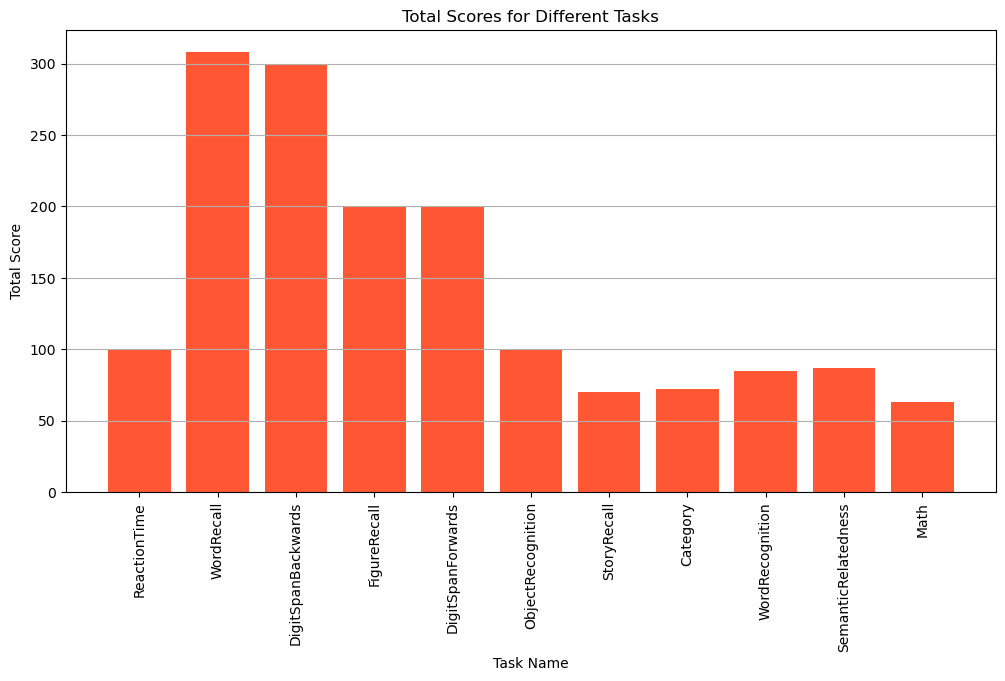

In [20]:

# Plotting the graph
plt.figure(figsize=(12, 6))
plt.bar(task_names, total_scores, color='#FF5733')
plt.title('Total Scores for Different Tasks')
plt.xlabel('Task Name')
plt.ylabel('Total Score')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()


In [21]:

# Extract completion times for each task
completion_times_data = {}
for task, info in data.items():
    if isinstance(info, dict) and "analysisResult" in info:
        analysis_result = info["analysisResult"]
        if isinstance(analysis_result, dict) and "completionTimes" in analysis_result:
            completion_times_data[task] = analysis_result["completionTimes"]
        else:
            # Add NaN values if completion times are missing
            completion_times_data[task] = [np.nan]

# Determine the maximum length of completion times
max_length = max(len(times) for times in completion_times_data.values())

# Pad completion times arrays with NaN to ensure equal length
for task in completion_times_data:
    completion_times_data[task] += [np.nan] * (max_length - len(completion_times_data[task]))

# Create DataFrame from completion times data
df = pd.DataFrame(completion_times_data)


# Display DataFrame
print("DataFrame for Completion Tasks:")
print(df)


DataFrame for Completion Tasks:
   ReactionTime  WordRecall  DigitSpanBackwards  FigureRecall  \
0       38949.0     10825.0                3080       14760.0   
1           NaN     14206.0                3575        8510.0   
2           NaN     14909.0                3983           NaN   
3           NaN     16391.0                6859           NaN   
4           NaN         NaN                1396           NaN   

   DigitSpanForwards  ObjectRecognition  StoryRecall  Category  \
0               6567            18978.0     280666.0   72176.0   
1               1845                NaN          NaN       NaN   
2               6214                NaN          NaN       NaN   
3               1827                NaN          NaN       NaN   
4               1513                NaN          NaN       NaN   

   WordRecognition  SemanticRelatedness     Math  
0          48242.0              26317.0  31254.0  
1              NaN                  NaN      NaN  
2              NaN         

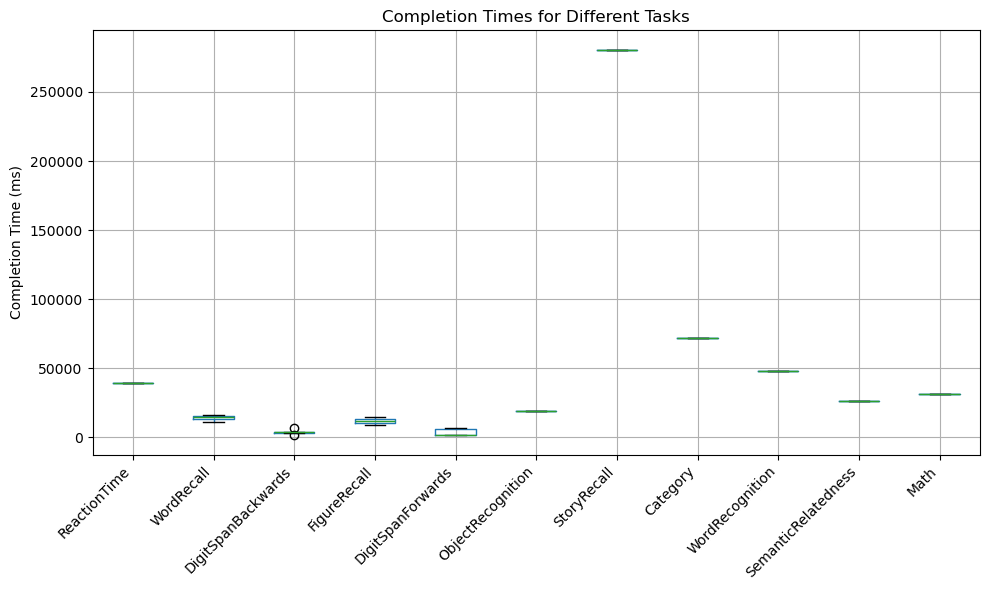

In [22]:
# Plot graph
plt.figure(figsize=(10, 6))
df.boxplot()
plt.title('Completion Times for Different Tasks')
plt.ylabel('Completion Time (ms)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [27]:
import streamlit as st
import pandas as pd
import json
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# Function to extract user profile from JSON data
def extract_user_profile(data):
    return {
        'name': data.get('name', 'N/A'),
        'age': data.get('age', 'N/A')
    }

# Function to plot total scores
def plot_total_scores(df):
    fig = px.bar(df, x='Task Name', y='Total Score', color='File Name',
                 title='Total Scores for Different Tasks')
    st.plotly_chart(fig)

def plot_completion_times(df_completion_times):
    fig = px.box(df_completion_times, x='Task Name', y='Completion Time', color='File Name',
                 title='Completion Times for Different Tasks',
                 labels={'Completion Time': 'Completion Time (ms)', 'Task Name': 'Task Name'})
    st.plotly_chart(fig)

def plot_variance_error_rates(task_names, variances, error_rates, file_names):
    # Check if all lists are of the same length
    if len(task_names) != len(variances) or len(task_names) != len(error_rates) or len(task_names) != len(file_names):
        st.error("Mismatch in lengths of lists for plotting variances and error rates.")
        return

    # Prepare DataFrame for variance plotting
    df_variance = pd.DataFrame({
        'Task Name': task_names,
        'Variance': variances,
        'File Name': file_names
    })

    # Plot variance
    fig_variance = px.bar(df_variance, x='Task Name', y='Variance', color='File Name',
                         title='Variances of Tasks with Multiple Trials',
                         labels={'Variance': 'Variance'})
    st.plotly_chart(fig_variance)

    # Plot error rates
    fig_error_rates = go.Figure()
    for i, rates in enumerate(error_rates):
        if len(rates) > 0:  # Ensure there's data to plot
            fig_error_rates.add_trace(go.Scatter(y=rates, mode='lines', name=f'{task_names[i]} ({file_names[i]})'))

    fig_error_rates.update_layout(title='Error Rates of Tasks with Multiple Trials',
                                  xaxis_title='Trial',
                                  yaxis_title='Error Rate')
    st.plotly_chart(fig_error_rates)

def plot_serial_position_effects(task_names, primacy_effects, middle_effects, recency_effects, file_names):
    # Check if all lists are of the same length
    if len(task_names) != len(primacy_effects) or len(task_names) != len(middle_effects) or len(task_names) != len(recency_effects) or len(task_names) != len(file_names):
        st.error("Mismatch in lengths of lists for serial position effects.")
        return

    df = pd.DataFrame({
        'Task Name': task_names,
        'Primacy Effect': primacy_effects,
        'Middle Effect': middle_effects,
        'Recency Effect': recency_effects,
        'File Name': file_names
    })

    # Create separate bar charts for each file
    file_names_unique = df['File Name'].unique()
    for file_name in file_names_unique:
        file_df = df[df['File Name'] == file_name]
        
        # Melt data for Plotly Express
        file_df_melted = file_df.melt(id_vars=['Task Name'], value_vars=['Primacy Effect', 'Middle Effect', 'Recency Effect'],
                                      var_name='Effect Type', value_name='Effect Value')
        
        fig = px.bar(file_df_melted, x='Task Name', y='Effect Value', color='Effect Type',
                     color_discrete_map={'Primacy Effect': 'blue', 'Middle Effect': 'green', 'Recency Effect': 'red'},
                     title=f'Serial Position Effects for {file_name}',
                     labels={'Effect Value': 'Effect Value', 'Effect Type': 'Effect Type'})
        st.plotly_chart(fig)

    # Create radial lollipop chart for combined serial position effects
    df_melted = df.melt(id_vars=['Task Name', 'File Name'], value_vars=['Primacy Effect', 'Middle Effect', 'Recency Effect'],
                        var_name='Effect Type', value_name='Effect Value')

    fig = go.Figure()

    colors = {'Primacy Effect': 'blue', 'Middle Effect': 'green', 'Recency Effect': 'red'}

    for effect_type in df_melted['Effect Type'].unique():
        df_filtered = df_melted[df_melted['Effect Type'] == effect_type]
        fig.add_trace(go.Scatterpolar(
            r=df_filtered['Effect Value'],
            theta=df_filtered['Task Name'],
            mode='markers+lines',
            name=effect_type,
            text=df_filtered['File Name'],  # Add file name as text for hover information
            line=dict(color=colors[effect_type]),
            marker=dict(size=8, color=colors[effect_type])
        ))

    fig.update_layout(
        polar=dict(
            radialaxis=dict(visible=True, range=[0, 1]),
            angularaxis=dict(tickmode='array', tickvals=df['Task Name'].unique())
        ),
        title='Serial Position Effects Across Files',
        showlegend=True
    )

    st.plotly_chart(fig)

# Main Streamlit app
st.title('Score Analysis Dashboard')

# Sidebar for file selection
st.sidebar.title('File Selection')
uploaded_files = st.sidebar.file_uploader("Choose JSON files", type="json", accept_multiple_files=True)

if uploaded_files:
    all_data = []
    user_profiles = []
    for uploaded_file in uploaded_files:
        try:
            data = json.load(uploaded_file)
            all_data.append((uploaded_file.name, data))
            user_profiles.append((uploaded_file.name, extract_user_profile(data)))
        except json.JSONDecodeError:
            st.error(f"File {uploaded_file.name} is not a valid JSON.")
    
    st.sidebar.title('User Profile Information')
    for i, (filename, user_profile) in enumerate(user_profiles):
        st.sidebar.markdown(f"**File {i+1}:** {filename}")
        st.sidebar.markdown(f"**Name:** {user_profile['name']}")
        st.sidebar.markdown(f"**Age:** {user_profile['age']}")

    if all_data:
        try:
            df_list = []
            completion_times_list = []
            task_names = []
            variances = []
            error_rates = []
            file_names = []
            primacy_effects = []
            middle_effects = []
            recency_effects = []

            for filename, data in all_data:
                for task_name, task_data in data.items():
                    if isinstance(task_data, dict):
                        if 'totalScore' in task_data:
                            task_name_clean = task_data['taskName'].replace('TaskName.', '')
                            df_list.append({
                                'File Name': filename,
                                'Task Name': task_name_clean,
                                'Total Score': task_data['totalScore']
                            })
                    
                        if 'analysisResult' in task_data:
                            analysis_result = task_data["analysisResult"]
                            if isinstance(analysis_result, dict) and "completionTimes" in analysis_result:
                                task_name_clean = task_data.get('taskName', '').replace('TaskName.', '')
                                for time in analysis_result["completionTimes"]:
                                    completion_times_list.append({
                                        'File Name': filename,
                                        'Task Name': task_name_clean,
                                        'Completion Time': time
                                    })
                            else:
                                completion_times_list.append({
                                    'File Name': filename,
                                    'Task Name': task_data.get('taskName', '').replace('TaskName.', ''),
                                    'Completion Time': np.nan
                                })

                        if 'serialPositionEffect' in task_data:
                            serial_position_effects = task_data.get("serialPositionEffect", [])
                            for effect in serial_position_effects:
                                primacy_effects.append(effect.get("PrimacyEffect", 0))
                                middle_effects.append(effect.get("MiddleEffect", 0))
                                recency_effects.append(effect.get("RecencyEffect", 0))
                                task_names.append(task_data.get('taskName', '').replace('TaskName.', ''))
                                file_names.append(filename)
                                # For variance and error rates
                                task_responses = task_data.get('taskResponses', {})
                                if len(task_responses) > 1:
                                    variances.append(task_data.get("analysisResult", {}).get("variance", 0))
                                    error_rates.append(task_data.get("analysisResult", {}).get("errorRates", []))
                                else:
                                    variances.append(0)
                                    error_rates.append([])

            combined_df = pd.DataFrame(df_list)
            pivot_df = combined_df.pivot(index='Task Name', columns='File Name', values='Total Score')

            st.subheader('Data Table for Total Scores of Different Tasks')
            st.write(pivot_df)

            st.subheader('Total Scores for Different Tasks')
            plot_total_scores(combined_df)
            
            df_completion_times = pd.DataFrame(completion_times_list)
            st.subheader('Completion Times for Different Tasks')
            plot_completion_times(df_completion_times)

            st.subheader('Variance and Error Rates for Tasks with Multiple Trials')
            plot_variance_error_rates(task_names, variances, error_rates, file_names)

            st.subheader('Serial Position Effects Analysis')
            plot_serial_position_effects(task_names, primacy_effects, middle_effects, recency_effects, file_names)

        except Exception as e:
            st.error(f"An error occurred: {e}")


In [23]:

# Initialize lists for plotting
primacy_effects = []
middle_effects = []
recency_effects = []

# Extract data from JSON
for task_data in data.values():
    # Ensure task_data is a dictionary
    if isinstance(task_data, dict):
        serial_position_effects = task_data.get("serialPositionEffect", [])
        # Iterate over each serial position effect
        for effect in serial_position_effects:
            primacy_effects.append(effect.get("PrimacyEffect", 0))
            middle_effects.append(effect.get("MiddleEffect", 0))
            recency_effects.append(effect.get("RecencyEffect", 0))

# Create a DataFrame to display serial position effects
df = pd.DataFrame({
    'PrimacyEffect': primacy_effects,
    'MiddleEffect': middle_effects,
    'RecencyEffect': recency_effects
})

# Print the DataFrame
print("Serial Position Effects DataFrame:")
print(df)


Serial Position Effects DataFrame:
   PrimacyEffect  MiddleEffect  RecencyEffect
0       1.000000           0.5       0.000000
1       0.750000           0.0       0.750000
2       1.000000           1.0       1.000000
3       1.000000           1.0       1.000000
4       1.000000           1.0       1.000000
5       1.000000           1.0       1.000000
6       0.666667           0.5       0.666667
7       0.750000           1.0       1.000000


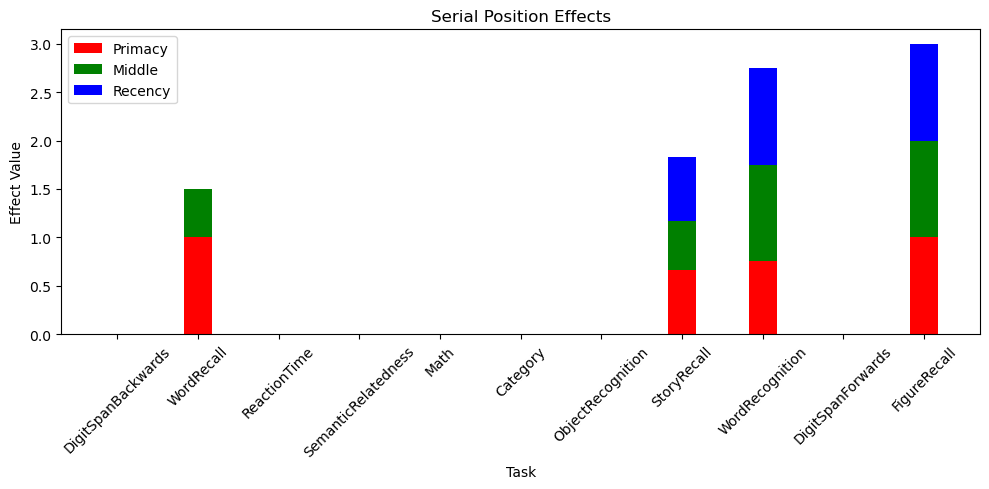

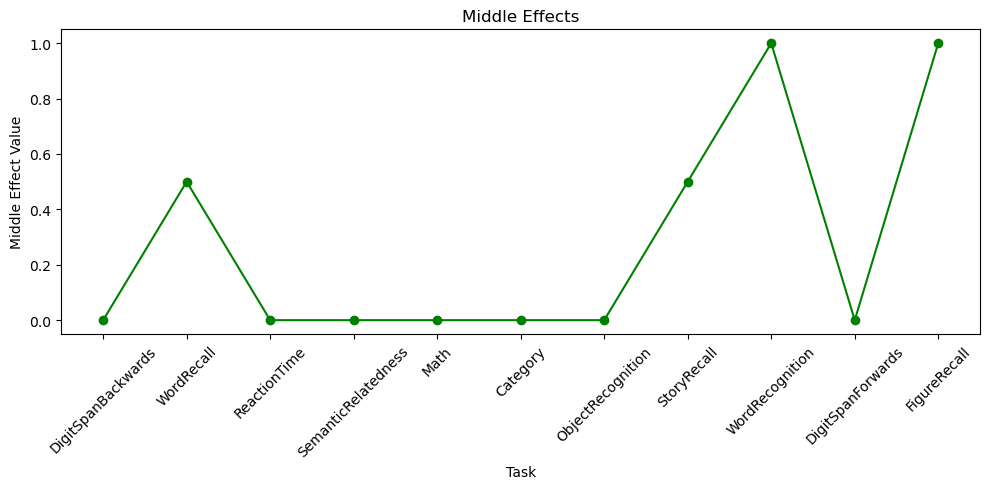

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import json

# Load the JSON data
with open('/Users/sanjanamortha/Desktop/Desktop/Ecowear/Data_analysis/scores_2024604/1717171773410.json', 'r') as file:
    data = json.load(file)

# Extract task names dynamically
task_names = []
primacy_effects = []
middle_effects = []
recency_effects = []

for task_data in data.values():
    if isinstance(task_data, dict) and 'taskName' in task_data:
        task_name = task_data['taskName'].split('.')[-1]  # Remove 'taskName.' from the label
        task_names.append(task_name)
        serial_position_effect = task_data.get('serialPositionEffect', [{}])[0]  # Get the first effect if available
        primacy_effects.append(serial_position_effect.get('PrimacyEffect', 0.0))
        middle_effects.append(serial_position_effect.get('MiddleEffect', 0.0))
        recency_effects.append(serial_position_effect.get('RecencyEffect', 0.0))

# Create an index for the tasks
task_indices = range(len(task_names))

# Plotting stacked bar chart for primacy, middle, and recency effects
plt.figure(figsize=(10, 5))
bar_width = 0.35

plt.bar(task_indices, primacy_effects, bar_width, label='Primacy', color='r')
plt.bar(task_indices, middle_effects, bar_width, bottom=primacy_effects, label='Middle', color='g')
plt.bar(task_indices, recency_effects, bar_width, bottom=np.array(primacy_effects) + np.array(middle_effects), label='Recency', color='b')

plt.xlabel('Task')  # Change the x-axis label
plt.ylabel('Effect Value')
plt.title('Serial Position Effects')
plt.xticks(task_indices, task_names, rotation=45)  # Use task names for x-axis ticks
plt.legend()

plt.tight_layout()
plt.show()

# Plotting line graph for middle effects
plt.figure(figsize=(10, 5))
plt.plot(range(len(middle_effects)), middle_effects, marker='o', color='g')
plt.title('Middle Effects')
plt.xlabel('Task')  # Change the x-axis label
plt.ylabel('Middle Effect Value')
plt.xticks(range(len(middle_effects)), task_names, rotation=45)  # Use task names for x-axis ticks

plt.tight_layout()
plt.show()


Final Scores:
Final Score: 117
Final Score: 146
Final Score: 6
Final Score: 0


/opt/anaconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


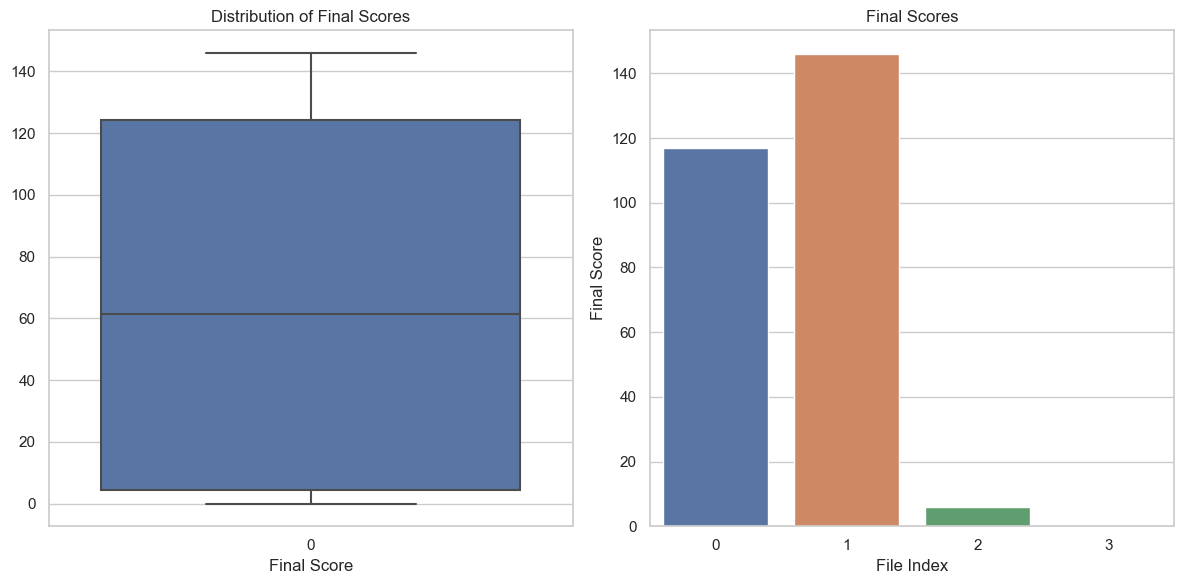

In [ ]:
import json
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Directory containing the JSON files
json_directory = '/Users/sanjanamortha/Desktop/Desktop/Ecowear/Data_analysis/scores_2024604'

# List to store final scores
final_scores = []

# Function to read and extract finalScore from JSON files
def extract_final_score(file_path):
    with open(file_path, 'r') as file:
        try:
            data = json.load(file)
            if 'finalScore' in data:
                return data['finalScore']
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON from {os.path.basename(file_path)}: {e}")
    return None

# Iterate over each file in the directory
for filename in os.listdir(json_directory):
    if filename.endswith('.json'):
        file_path = os.path.join(json_directory, filename)
        final_score = extract_final_score(file_path)
        if final_score is not None:
            final_scores.append(final_score)

# Print final scores
print("Final Scores:")
for score in final_scores:
    print(f"Final Score: {score}")

# Check if any final scores were collected
if not final_scores:
    print("No final scores found.")
else:
    # Plot the final scores using Seaborn
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 6))
    
    # Create a seaborn boxplot
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
    sns.boxplot(final_scores)
    plt.title('Distribution of Final Scores')
    plt.xlabel('Final Score')
    
    # Create a seaborn bar plot
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
    sns.barplot(x=list(range(len(final_scores))), y=final_scores)
    plt.title('Final Scores')
    plt.xlabel('File Index')
    plt.ylabel('Final Score')
    
    # Show the plot
    plt.tight_layout()
    plt.show()

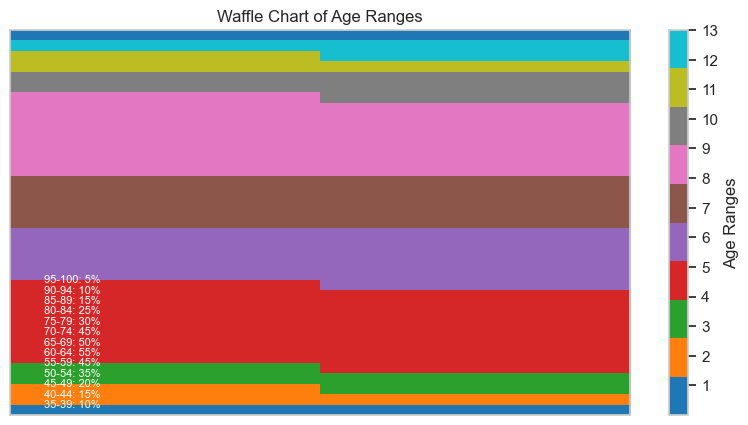

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Age ranges and their corresponding percentages
age_ranges = [
    "35-39", "40-44", "45-49", "50-54", "55-59", 
    "60-64", "65-69", "70-74", "75-79", "80-84", 
    "85-89", "90-94", "95-100"
]
percentages = [10, 15, 20, 35, 45, 55, 50, 45, 30, 25, 15, 10, 5]

# Create the waffle chart
def create_waffle_chart(age_ranges, percentages):
    total = sum(percentages)
    width = 10
    height = total // width + 1

    # Create a grid for the chart
    grid = np.zeros((height, width))

    idx = 0
    for i, percentage in enumerate(percentages):
        count = percentage
        for _ in range(count):
            grid[idx // width, idx % width] = i + 1
            idx += 1

    plt.figure(figsize=(10, 5))
    plt.imshow(grid, cmap='tab10', aspect='auto')
    plt.colorbar(ticks=range(1, len(age_ranges) + 1), label='Age Ranges', 
                 orientation='vertical', format='%d')
    plt.title('Waffle Chart of Age Ranges')
    plt.xticks([])
    plt.yticks([])
    plt.gca().invert_yaxis()

    # Add labels with percentages
    for i in range(len(age_ranges)):
        plt.text(0.5, i + 0.5, f"{age_ranges[i]}: {percentages[i]}%", 
                 ha='center', va='center', color='white', fontsize=8)

    plt.show()

create_waffle_chart(age_ranges, percentages)
